:0: FutureWarning: IPython widgets are experimental and may change in the future.


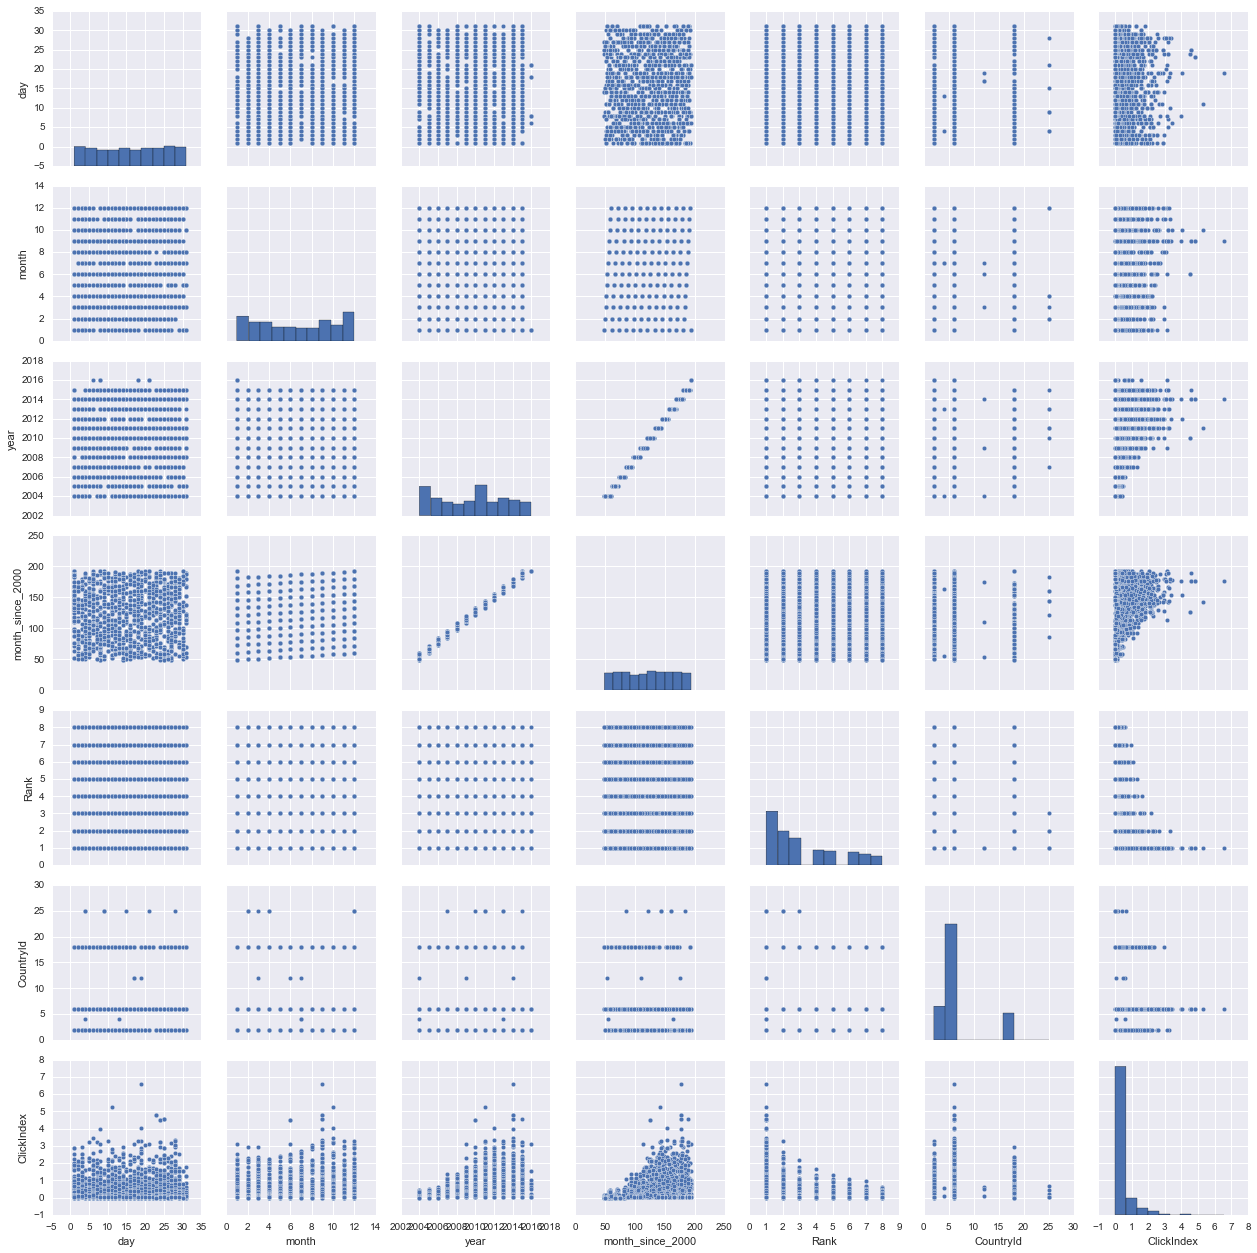

In [1]:
'''
I've attempted to approach the click index prediction as a regression problem,
however a linear regression approach didn't work. It produced a low score even on training data,
indicating a underfit senario. To accomodate the non-linear natrual of the feature I've also
tried a non-linear regressor (SVR), but still it couldn't fit well (see second block for code used).


I've used the ploting to visualise some of the features in order to understand the data
execute this block to see the pair-wise plot, the last row of the figure shows the relationship 
between each feature (day, month, year, month since 2010 etc).

It did show me that some features, such as 'Rank', 'month since 2010' are more influential 
than, say 'day' which appeared random (less useful).

If I were to continue to work on this question I'd like to model it in a similarity measure context:
find the most similar features between the unseen example and the training data, use its click-index 
as a base value and factor in the time series trends.



'''


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd
from sklearn.svm import SVR

%matplotlib inline

train_input='task_features.tsv'
df_data = pd.read_csv(train_input,sep='\t')
ads_data = df_data[df_data['Position'] != 'organicRes']

tstamp = pd.to_datetime(df_data['Timestamp'])
df_data2 = ads_data.drop(['Timestamp','PageId'], 1)

# transform timestamp into features
date_features = pd.concat([tstamp.dt.day, tstamp.dt.month, tstamp.dt.year, (tstamp.dt.year-2000)*12+tstamp.dt.month], axis=1)
date_features.columns = ['day', 'month','year','month_since_2000']

# Group features by types
col_by_types = df_data2.columns.to_series().groupby(df_data2.dtypes).groups
cat_cols = col_by_types[np.dtype('O')]
int_cols = col_by_types[np.dtype('int64')]
float_cols = col_by_types[np.dtype('float64')]
# Get dummies for categorical features
#print('Get dummies for categorical features')
dummies = pd.get_dummies(df_data2[cat_cols], dummy_na=True)
#dummies.shape
all_features = pd.concat([date_features,df_data2[int_cols],#dummies,
                          df_data2[float_cols]],join='inner',axis=1)


seaborn.pairplot(all_features.iloc[:4000])

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import cross_validation
from sklearn.decomposition import RandomizedPCA
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt
import seaborn
import numpy as np
import pandas as pd
from sklearn.svm import SVR

%matplotlib inline

train_input='task_features.tsv'
df_data = pd.read_csv(train_input,sep='\t')
ads_data = df_data[df_data['Position'] != 'organicRes']

tstamp = pd.to_datetime(df_data['Timestamp'])
df_data2 = ads_data.drop(['Timestamp','PageId'], 1)

# transform timestamp into features
date_features = pd.concat([tstamp.dt.day, tstamp.dt.month, tstamp.dt.year], axis=1)
date_features.columns = ['day', 'month','year']

# Group features by types
col_by_types = df_data2.columns.to_series().groupby(df_data2.dtypes).groups
cat_cols = col_by_types[np.dtype('O')]
int_cols = col_by_types[np.dtype('int64')]
float_cols = col_by_types[np.dtype('float64')]
#print(cat_cols)
#print(int_cols)
#print(float_cols)
# Get dummies for categorical features
#print('Get dummies for categorical features')
dummies = pd.get_dummies(df_data2[cat_cols], dummy_na=True)
#dummies.shape
all_features = pd.concat([date_features,df_data2[int_cols],#dummies,
                          df_data2[float_cols]],join='inner',axis=1)
X = all_features.drop(['ClickIndex'],axis=1)
X = X.drop(['CountryId'],axis=1)

#print(X)
target = all_features['ClickIndex']

#seaborn.pairplot(all_features.iloc[:4000])
#print(target)
#print(y_test.shape)
#data_train
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X.iloc[:9000], target.iloc[:9000], test_size=0.3, random_state=0)

#D-reduction
#n_components = 2
#pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)

#X_train_pca = pca.transform(X_train)
#X_test_pca = pca.transform(X_test)

svr_poly = SVR(kernel='poly', C=1e3, degree=2)
y_poly = svr_poly.fit(X_train, y_train).predict(X_train)
print(svr_poly.score(X_train, y_train))